 <h1><b><center>Crop Recommendation</b></h1>



<h2>Abstract</h2><br>
<p>
Agriculture is one of the most important sectors in India and the farmers are one of the most essential members of society.
In India Agriculture plays a predominant role in the economy and employment. One of the major problems among Indian farmers is that they don't choose the right crop based on their soil requirements. Due to this farmers face many problems in the productivity of crops. This problem has been addressed through precision agriculture. </p>
<p>
Precision agriculture is a trend now-a-days. It helps the farmers to take the decision about the farming strategy. 
Precision Agriculture is a strategy that uses data such as soil characteristics and climate data to suggest the crop to be grown. Emerging technologies like Artificial Intelligence and IoT can help in this task. IoT sensors captures the soil characteristics and weather data, this data can be used to build a Deep Learning model which can recommend the most suitable crops to grow on a particular farm. This can help farmers to make decisions on which crops to grow on their farm. 
</p>

<h3><b>About the Project:</b></h3>
<p>
The Project is about building an Artificial Neural Network model that predicts which crop to be grown based on 
these features.<br>
1.   N - ratio of Nitrogen content in soil<br>
2.   P - ratio of Phosphorous content in soil<br>
3.   K - ratio of Potassium content in soil<br>
4.   temperature - temperature in degree Celsius<br>
5.   humidity - relative humidity in %<br>
6.   ph - ph value of the soil<br>
7.   rainfall - rainfall in mm<br>

<h3><b>Dataset:</b></h3>

[<button>dataset</button>](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset)




Machine Learning Pipeline:

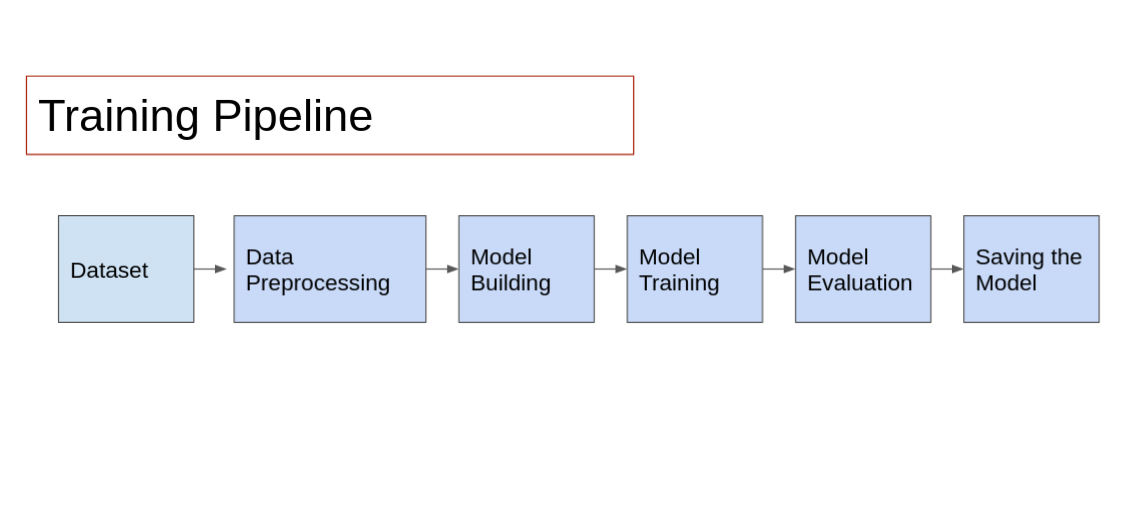

Importing the Packages




In [130]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [131]:
train_accuracy = {}
test_accuracy = {}

Reding the Crop_recommendation.csv file using pandas read_csv() method.

In [132]:
df = pd.read_csv('Crop_recommendation.csv')

In [133]:
df.iloc[:,:]

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

Printing the summary of the data using info() method.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Printing the first ten rows from the dataset using head() method.

In [135]:
df.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

Finding whether there are any null values in the dataset

In [136]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

##Exploratory Data Analysis

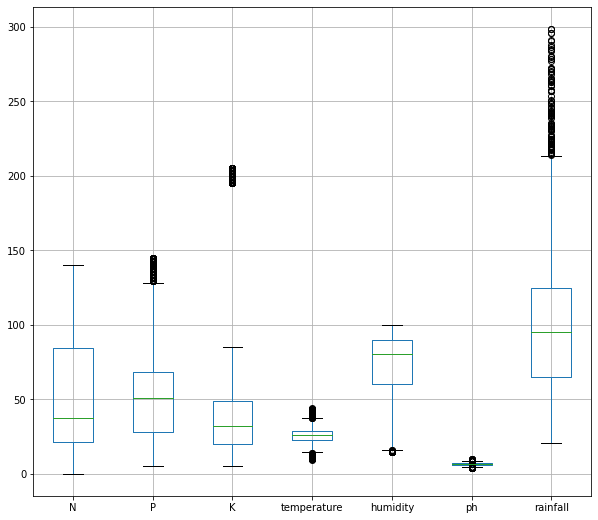

In [137]:
plt.figure(figsize=(10,9))
df.boxplot()
plt.show()

In [138]:
df.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

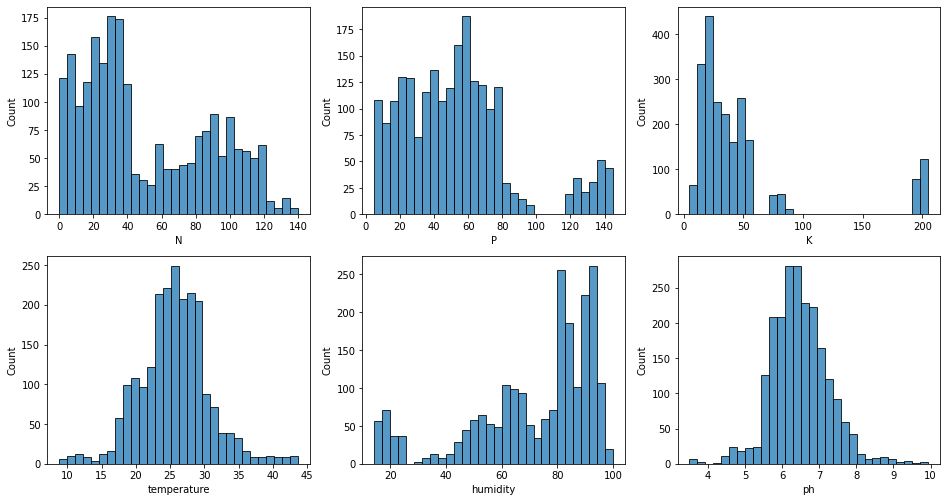

<AxesSubplot:xlabel='rainfall', ylabel='Count'>

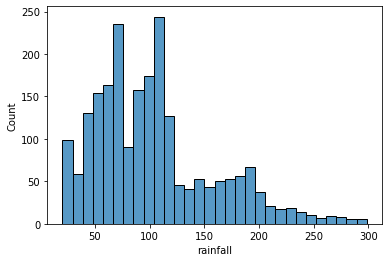

In [139]:
columns = df.columns[:-1]
plt.figure(figsize=(16,13))

i=1
for col in columns[:-1]:
  plt.subplot(3,3,i)
  sns.histplot(df[col], bins=30)
  i+=1
plt.show()

sns.histplot(df[columns[-1]],bins=30)

<AxesSubplot:ylabel='Count'>

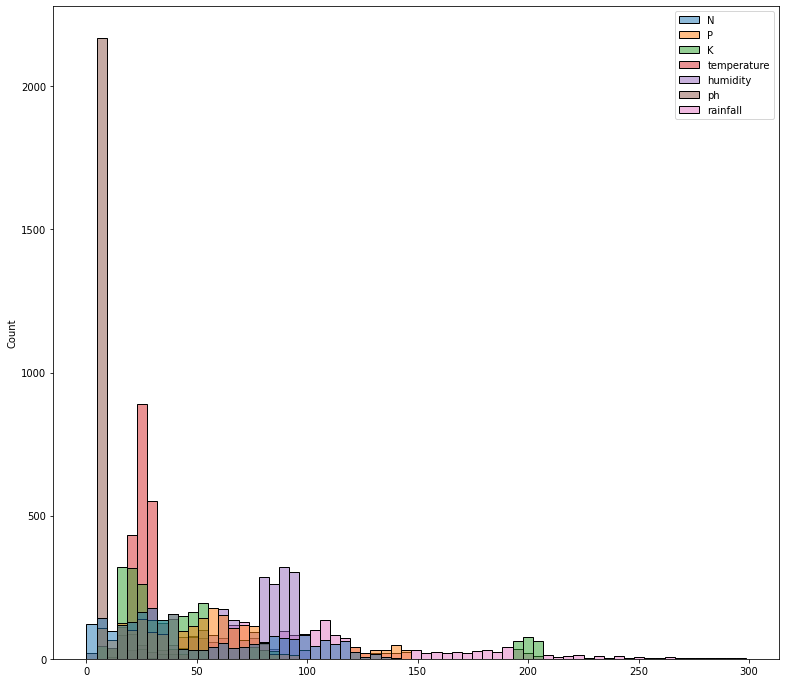

In [140]:
plt.figure(figsize=(13,12))
sns.histplot(df[columns])

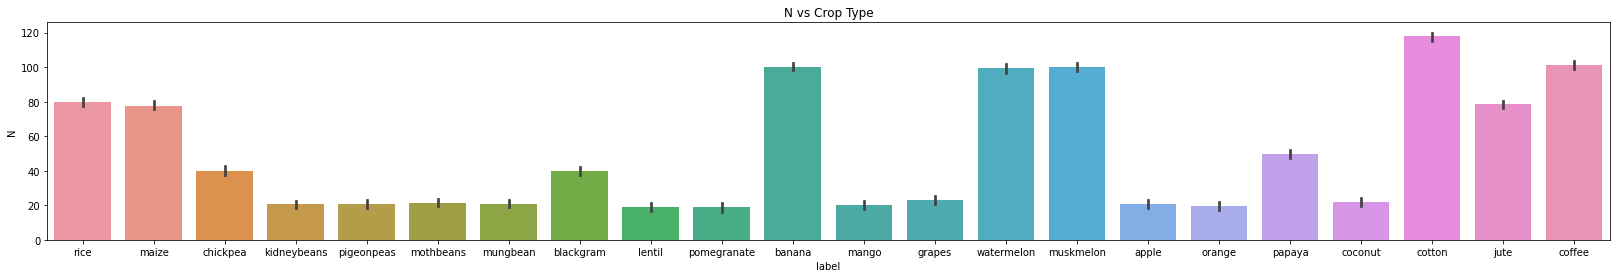

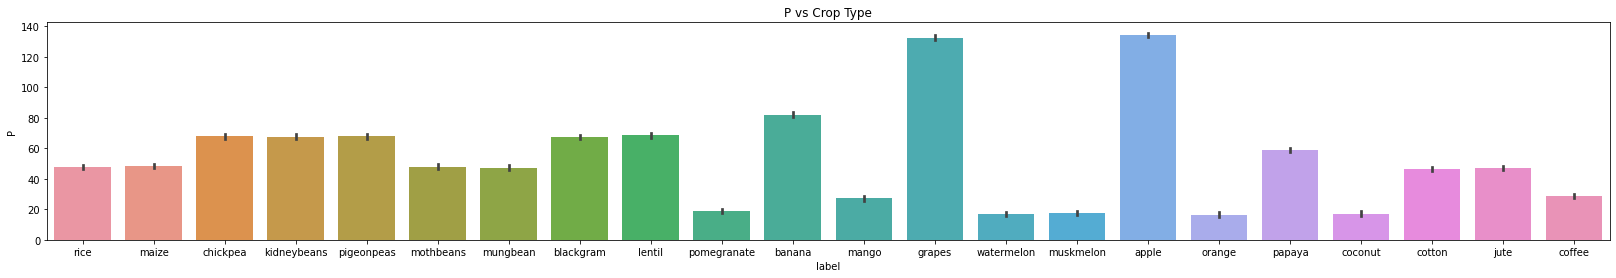

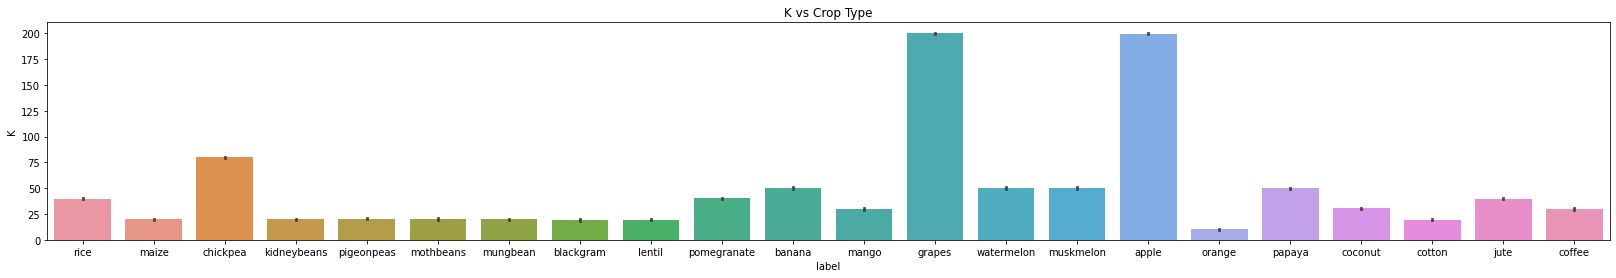

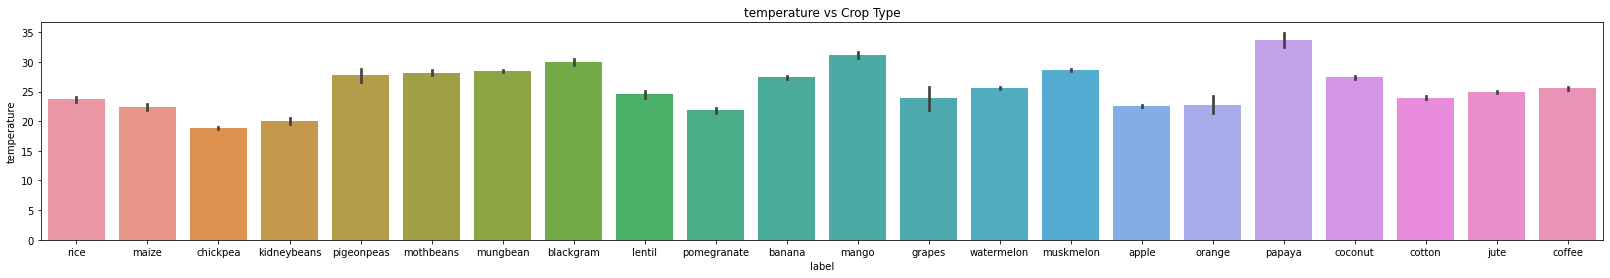

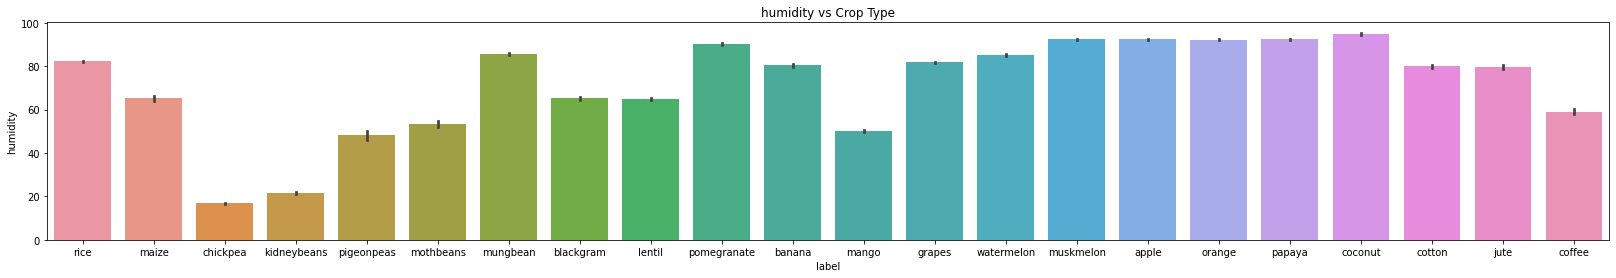

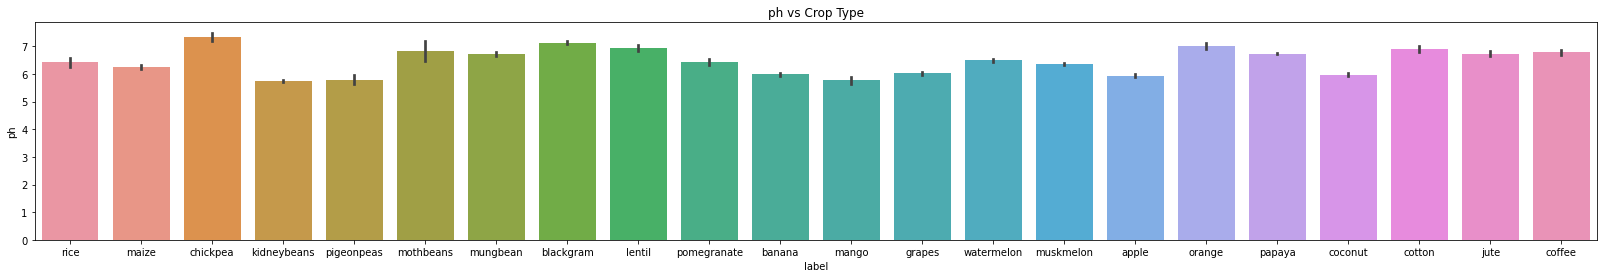

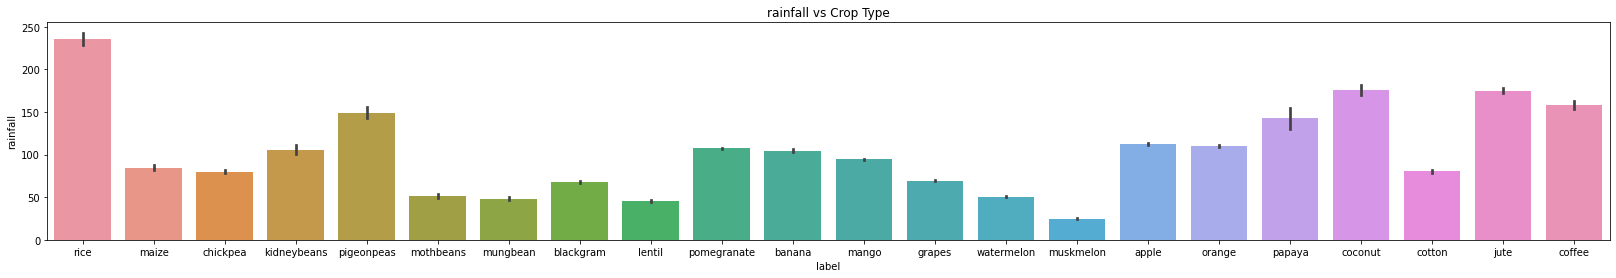

In [141]:
for col in columns:
  plt.figure(figsize=(28,4))
  sns.barplot(x="label",y=col, data=df)
  plt.title(f"{col} vs Crop Type")
  plt.show()

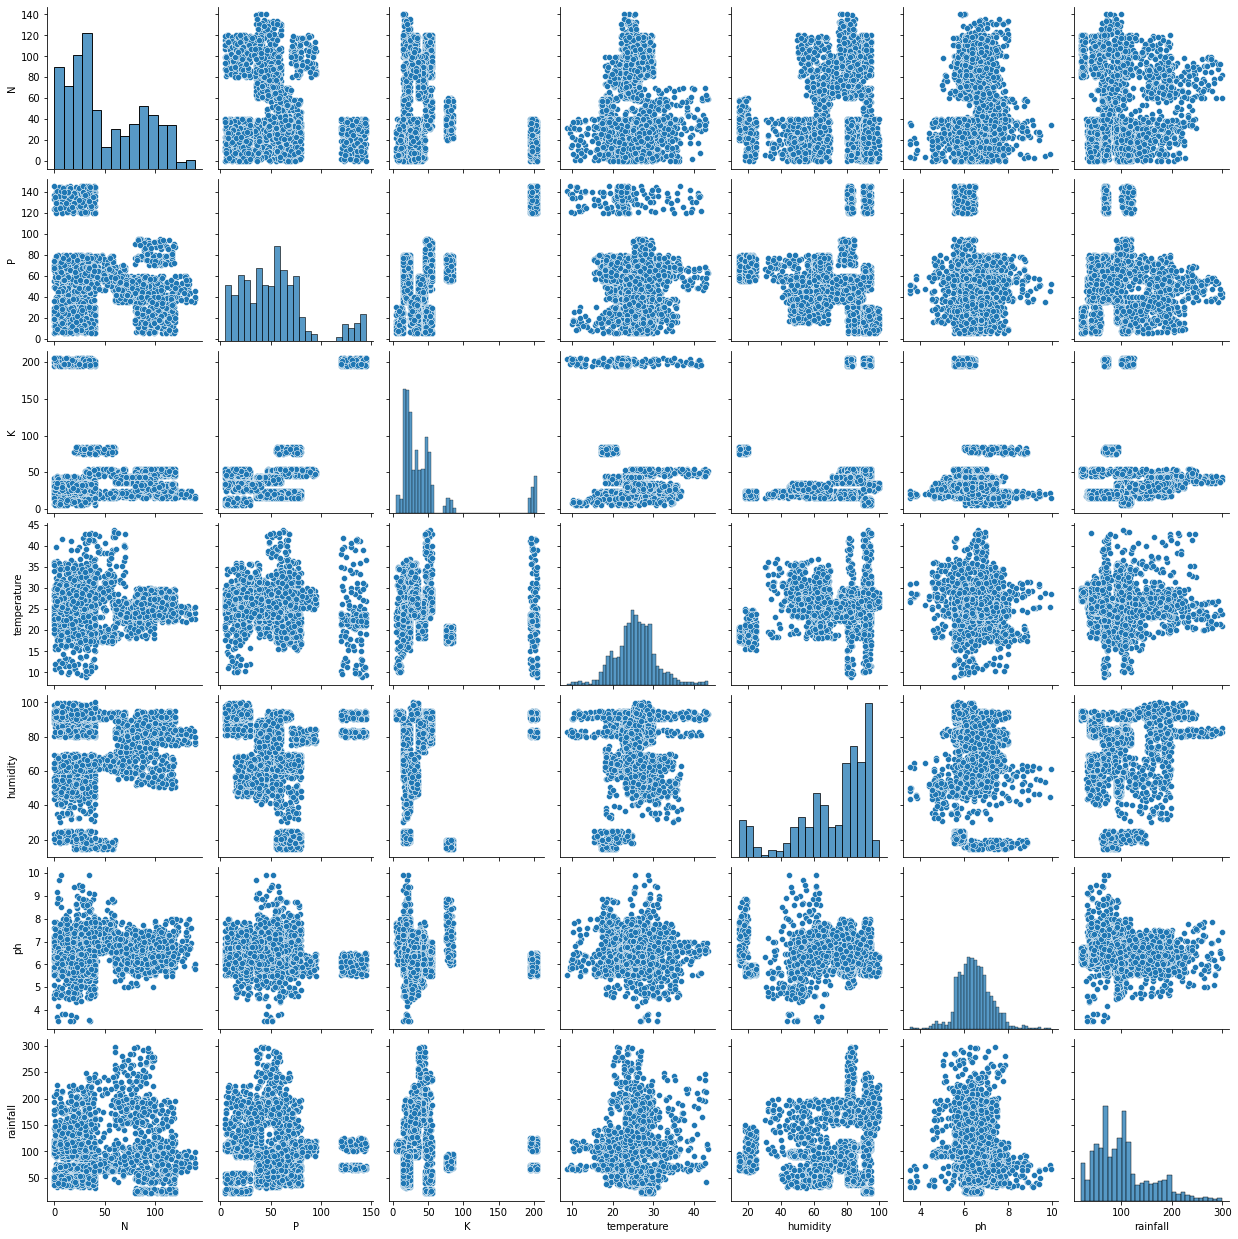

In [142]:
sns.pairplot(df)

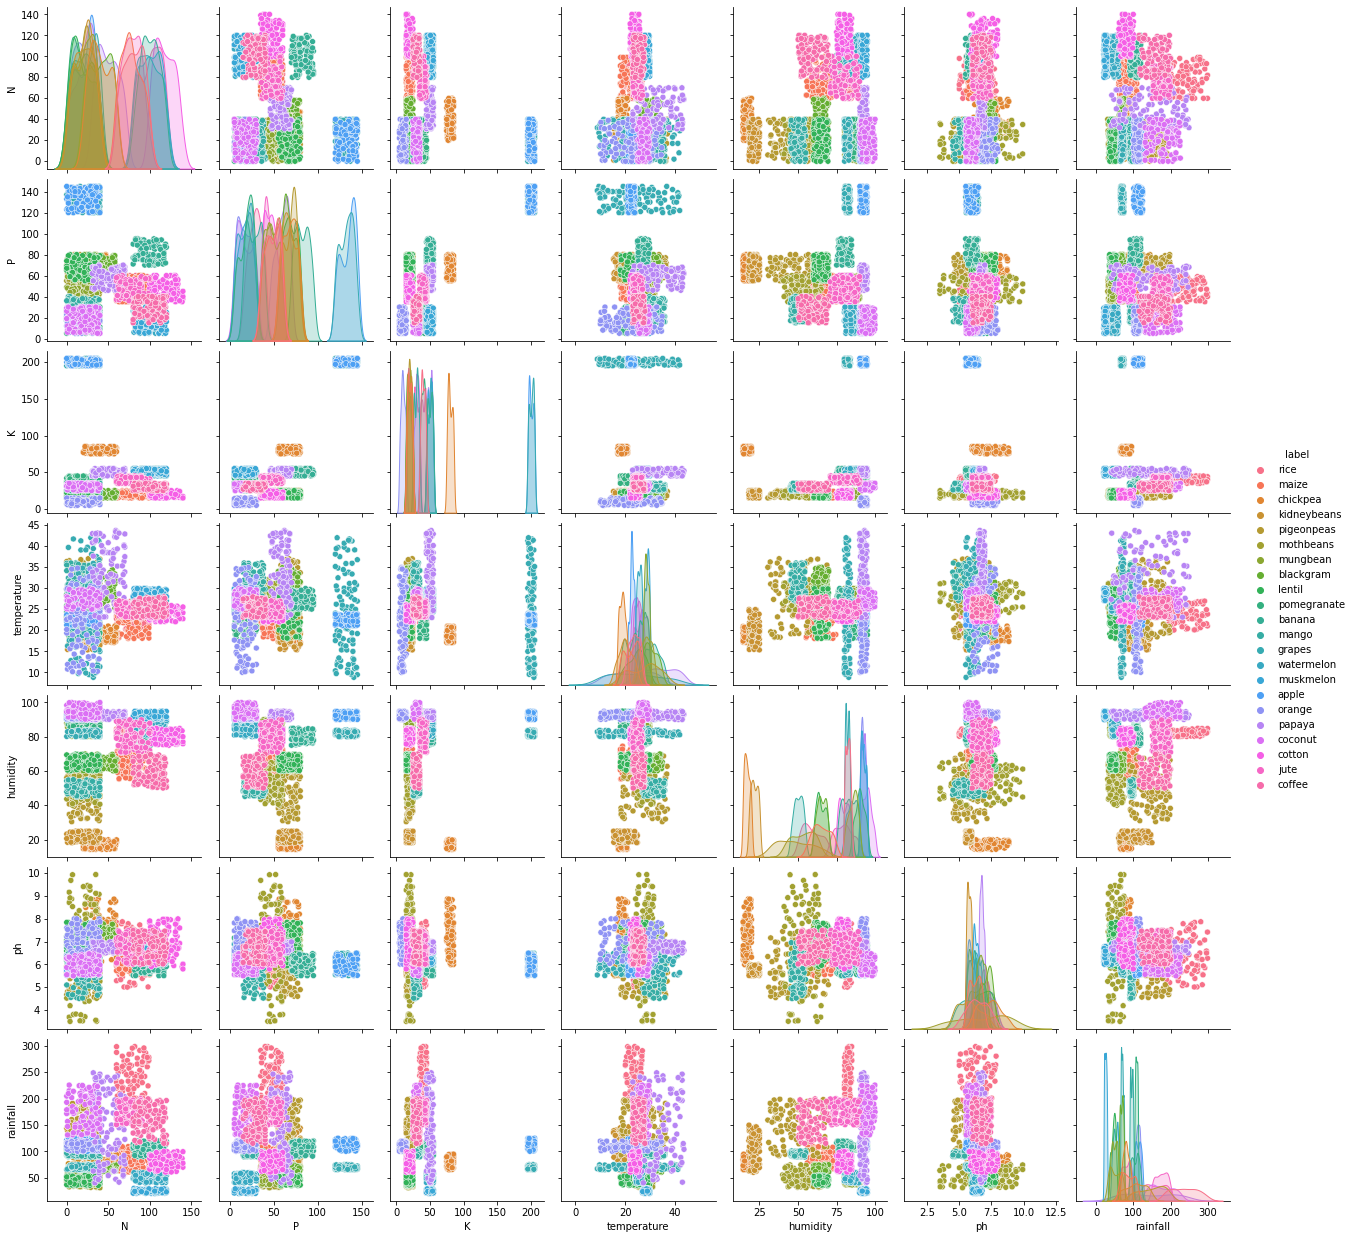

In [143]:
sns.pairplot(df,hue='label')

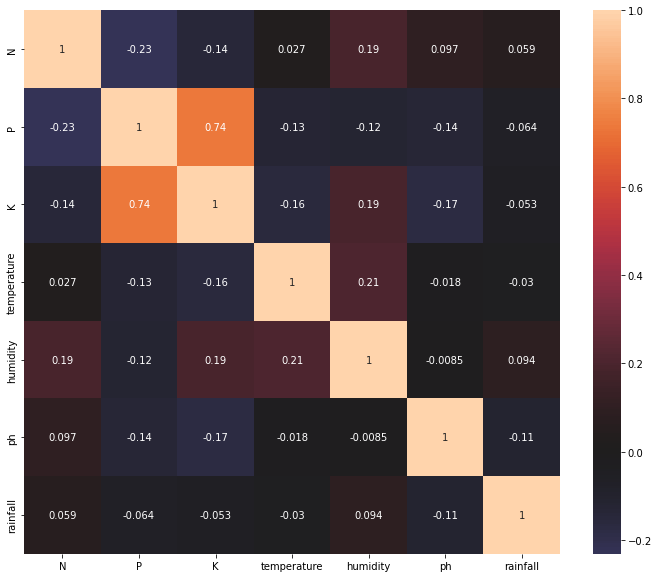

In [144]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()

<AxesSubplot:>

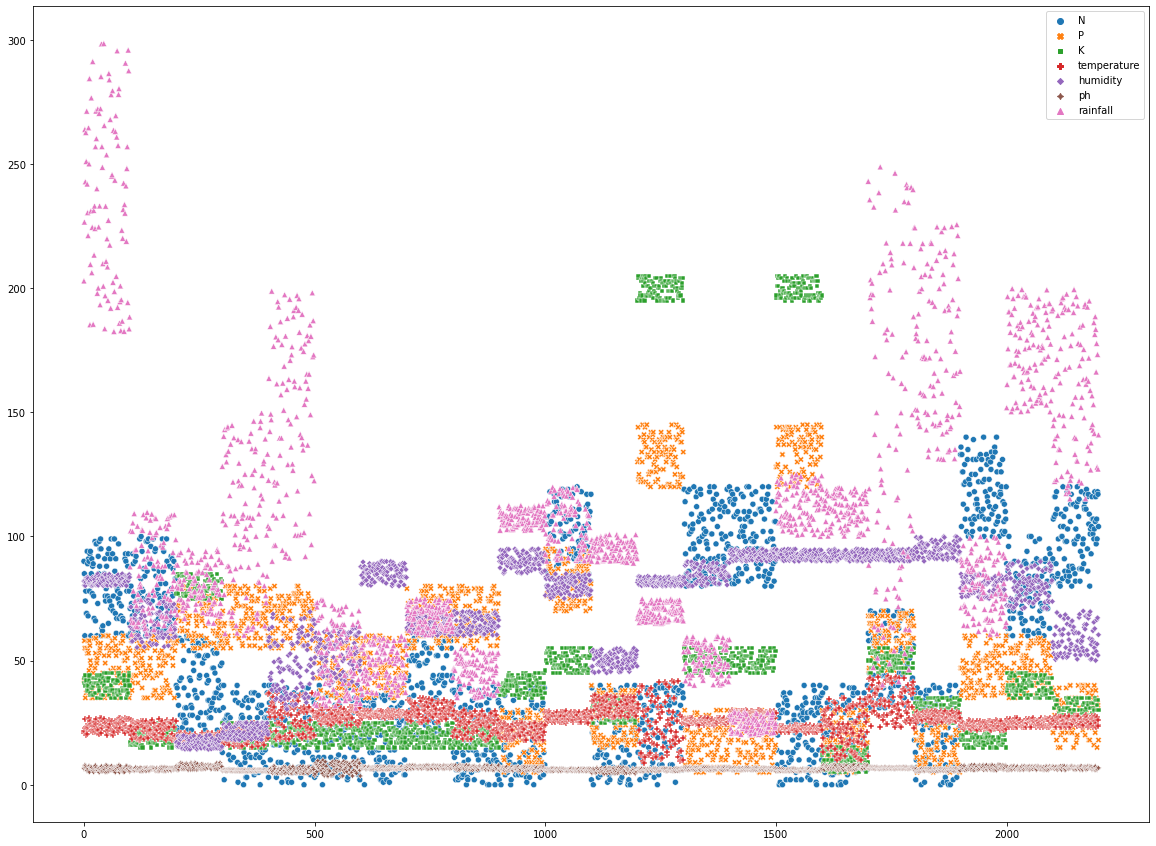

In [145]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df)

In [146]:
x = df['label'].value_counts().to_dict()

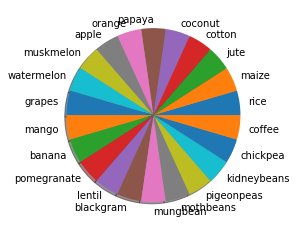

In [147]:
x_v = list(x.values())
x_k = list(x.keys())
plt.pie(x_v, labels=x_k, shadow=True)
plt.show()

Handling Categorical Data

Creating the list of output labels

In [148]:
labels = df['label'].unique()

Creating the dictionary of categorical values and their labels

In [149]:
labeled_data = {}
j=0
for i in labels:
  labeled_data[i] = j
  j+=1

In [150]:
print(labeled_data)

{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [151]:
label_values = list(labeled_data.values())

In [152]:
print(labels)
print("\n\n")
print(label_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [153]:
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Label encoding the categorical values and adding the label_encoded column in the dataframe with encoded values

In [154]:
df['label_encoded'] = df.label.map(labeled_data)

In [155]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   label_encoded  
0              0  
1              0  
2              0  
3              0  
4              0

In [156]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  label_encoded  
count  2200.000000  2200.000000    2200.000000  
mean      6.469480   103.463655      10.500000  
std       0.773938    54.958389       6.345731  
min       3.504752    20.211267       0.000000  
25%       5.971693    64.551686       5.000000  
50%       6.425045    94.867624      10.500000  
75%       6.923643   124.267508      16.000000  
max       9.935091   298.560117      21.000000

Separting the Input and output features in the dataset

In [157]:
X = df.drop(['label','label_encoded'],axis=1)
X.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [158]:
y = df['label_encoded']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_encoded, dtype: int64

Splitting the data into train set and test set

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

Feature Scaling: Scaling the numerical data

In [160]:
sc = StandardScaler()

In [161]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [162]:
sc.mean_

array([ 50.39261364,  52.88238636,  47.23579545,  25.58610532,
        71.20236431,   6.46069391, 104.99553826])

In [163]:
np.sqrt(sc.var_)

array([36.6511325 , 32.50093228, 49.19601994,  5.08611542, 22.50626072,
        0.78173883, 55.66283749])

In [164]:
X_train.shape

(1760, 7)

##SVM Classifier

In [165]:
from sklearn.svm import SVC
from sklearn import metrics

In [166]:
SVM = SVC(gamma=5)

In [167]:
SVM.fit(X_train,y_train)

SVC(gamma=5)

In [168]:
# Accuracy for training data
predicted_train_val = SVM.predict(X_train)
m1 = metrics.accuracy_score(y_train,predicted_train_val)
print('Traning Accuracy of SVM Model:',m1)

Traning Accuracy of SVM Model: 0.9994318181818181


In [169]:

# Testing accuracy
predicted_val = SVM.predict(X_test)
m2 = metrics.accuracy_score(y_test,predicted_val)
print('Testing Accuracy of SVM Model:',m2)

Testing Accuracy of SVM Model: 0.9454545454545454


In [170]:
train_accuracy['SVM Classifier'] = m1*100
test_accuracy['SVM Classifier'] = m2*100

#Logistic Regression Classifier

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
LR_model = LogisticRegression(random_state=2)

In [173]:
LR_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [174]:
predicted_lr_train = LR_model.predict(X_train)
m3 = metrics.accuracy_score(y_train,predicted_lr_train)
print('Traning Accuracy of Logistic Regression Model:',m3)

Traning Accuracy of Logistic Regression Model: 0.9772727272727273


In [175]:
# Testing accuracy
predicted_lr_test = LR_model.predict(X_test)
m4 = metrics.accuracy_score(y_test,predicted_lr_test)
print('Testing Accuracy of Logistic Regression Model:',m4)

Testing Accuracy of Logistic Regression Model: 0.9613636363636363


In [176]:
train_accuracy['Logistic Regression Classifier'] = m3*100
test_accuracy['Logistic Regression Classifier'] = m4*100

#Desicion Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=1,max_depth=5)


In [179]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [180]:
# Training Accuracy
predicted_DT_train = DT_model.predict(X_train)
acc1 = metrics.accuracy_score(y_train,predicted_DT_train)
print('Training Accuracy of Desicion Tree Model:',acc1)

Training Accuracy of Desicion Tree Model: 0.9340909090909091


In [181]:
#Testing Accuracy
predicted_DT_test = DT_model.predict(X_test)
acc2 = metrics.accuracy_score(y_test,predicted_DT_test)
print('Testing Accuracy of Desicion Tree Model:',acc2)

Testing Accuracy of Desicion Tree Model: 0.9227272727272727


In [182]:
train_accuracy['Desicion Tree Classifier'] = acc1*100
test_accuracy['Desicion Tree Classifier'] = acc2*100

# Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
RF_model = RandomForestClassifier(n_estimators=2, random_state=0)

In [185]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [186]:
# Training Accuracy
predicted_RF_train = RF_model.predict(X_train)
b1 = metrics.accuracy_score(y_train,predicted_RF_train)
print('Training Accuracy of Random Forest Model:',b1)

Training Accuracy of Random Forest Model: 0.9823863636363637


In [187]:
#Testing Accuracy
predicted_RF_test = RF_model.predict(X_test)
b2 = metrics.accuracy_score(y_test,predicted_RF_test)
print("Testing Accuracy of Random Forest Model",b2)

Testing Accuracy of Random Forest Model 0.9590909090909091


In [188]:
train_accuracy['Random Forest Classifier'] = b1*100
test_accuracy['Random Forest Classifier'] = b2*100

#KNN Classifier

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
KNN_model = KNeighborsClassifier(n_neighbors=2)

In [191]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [192]:
# Training Accuracy
predicted_KNN_train = KNN_model.predict(X_train)
c1 = metrics.accuracy_score(y_train,predicted_KNN_train)
print('Training Accuracy of KNN Model:',c1)

Training Accuracy of KNN Model: 0.9880681818181818


In [193]:
#Testing Accuracy
predicted_KNN_test = KNN_model.predict(X_test)
c2 = metrics.accuracy_score(y_test,predicted_KNN_test)
print("Testing Accuracy of KNN Model",c2)

Testing Accuracy of KNN Model 0.9636363636363636


In [194]:
train_accuracy['KNN Classifier'] = c1*100
test_accuracy['KNN Classifier'] = c2*100

# ANN Model

Building the architecture of the ANN Model

In [195]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(28,input_shape=(7,),activation='relu'))
model.add(keras.layers.Dense(64,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(28,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(22,input_shape=(7,), activation='softmax'))

In [196]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Architecture of the Neural Network

In [197]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 28)                224       
                                                                 
 dense_18 (Dense)            (None, 64)                1856      
                                                                 
 dense_19 (Dense)            (None, 28)                1820      
                                                                 
 dense_20 (Dense)            (None, 22)                638       
                                                                 
Total params: 4,538
Trainable params: 4,538
Non-trainable params: 0
_________________________________________________________________


Fitting the training data to the neural network model

In [198]:
history = model.fit(x=X_train, y = y_train,epochs=20,batch_size=50 )

Epoch 1/20
36/36 [==============================] - 2s 4ms/step - loss: 2.9878 - accuracy: 0.1267
Epoch 2/20
36/36 [==============================] - 0s 4ms/step - loss: 2.5797 - accuracy: 0.2693
Epoch 3/20
36/36 [==============================] - 0s 4ms/step - loss: 1.9628 - accuracy: 0.4790
Epoch 4/20
36/36 [==============================] - 0s 5ms/step - loss: 1.3191 - accuracy: 0.6585
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 0.8502 - accuracy: 0.8193
Epoch 6/20
36/36 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.8653
Epoch 7/20
36/36 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.9034
Epoch 8/20
36/36 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.9193
Epoch 9/20
36/36 [==============================] - 0s 4ms/step - loss: 0.2774 - accuracy: 0.9250
Epoch 10/20
36/36 [==============================] - 0s 4ms/step - loss: 0.2348 - accuracy: 0.9358
Epoch 11/20
36/36 [

Plotting the Loss and accuracy of the training data

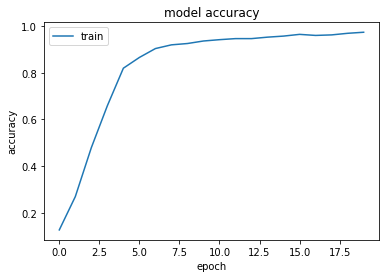

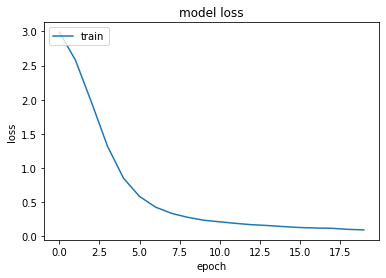

In [199]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluating the model on test data

In [200]:
eval = model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.9364


In [201]:
train_accuracy['ANN model'] = history.history['accuracy'][-1]*100
test_accuracy['ANN model'] = eval[-1]*100

In [202]:
train_accuracy

{'SVM Classifier': 99.94318181818181,
 'Logistic Regression Classifier': 97.72727272727273,
 'Desicion Tree Classifier': 93.4090909090909,
 'Random Forest Classifier': 98.23863636363637,
 'KNN Classifier': 98.80681818181817,
 'ANN model': 97.32954502105713}

In [203]:
test_accuracy

{'SVM Classifier': 94.54545454545455,
 'Logistic Regression Classifier': 96.13636363636363,
 'Desicion Tree Classifier': 92.27272727272727,
 'Random Forest Classifier': 95.9090909090909,
 'KNN Classifier': 96.36363636363636,
 'ANN model': 93.63636374473572}

Testing the model 

In [204]:
model.save("Crop_Recommendation.h5")


# LSTM Model

In [205]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((1, 7), input_shape=(7,)))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LSTM(32, return_sequences=False))
model.add(tf.keras.layers.Dense(22, activation='softmax'))


In [206]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [207]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 1, 7)              0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 64)             18432     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_21 (Dense)            (None, 22)                726       
                                                                 
Total params: 31,574
Trainable params: 31,574
Non-trainable params: 0
_________________________________________________________________


In [208]:
history = model.fit(x=X_train, y = y_train,epochs=30,batch_size=50 )

Epoch 1/30
36/36 [==============================] - 6s 6ms/step - loss: 3.0683 - accuracy: 0.2330
Epoch 2/30
36/36 [==============================] - 0s 6ms/step - loss: 2.9779 - accuracy: 0.4256
Epoch 3/30
36/36 [==============================] - 0s 6ms/step - loss: 2.7430 - accuracy: 0.4176
Epoch 4/30
36/36 [==============================] - 0s 6ms/step - loss: 2.3553 - accuracy: 0.4460
Epoch 5/30
36/36 [==============================] - 0s 6ms/step - loss: 1.9323 - accuracy: 0.4852
Epoch 6/30
36/36 [==============================] - 0s 6ms/step - loss: 1.5551 - accuracy: 0.5869
Epoch 7/30
36/36 [==============================] - 0s 7ms/step - loss: 1.2498 - accuracy: 0.6960
Epoch 8/30
36/36 [==============================] - 0s 6ms/step - loss: 1.0079 - accuracy: 0.7489
Epoch 9/30
36/36 [==============================] - 0s 6ms/step - loss: 0.8258 - accuracy: 0.8108
Epoch 10/30
36/36 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.8608
Epoch 11/30
36/36 [

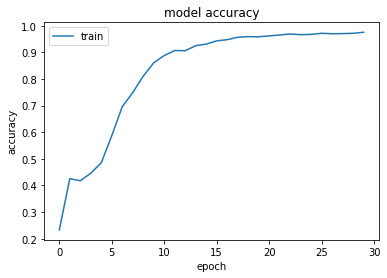

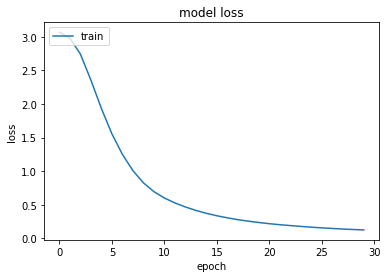

In [209]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [210]:
eval = model.evaluate(X_test,y_test)

14/14 [==============================] - 1s 4ms/step - loss: 0.1489 - accuracy: 0.9545


In [211]:
train_accuracy['LSTM Model'] = history.history['accuracy'][-1]*100
test_accuracy['LSTM model'] = eval[-1]*100

In [212]:
test_accuracy

{'SVM Classifier': 94.54545454545455,
 'Logistic Regression Classifier': 96.13636363636363,
 'Desicion Tree Classifier': 92.27272727272727,
 'Random Forest Classifier': 95.9090909090909,
 'KNN Classifier': 96.36363636363636,
 'ANN model': 93.63636374473572,
 'LSTM model': 95.45454382896423}

In [218]:
model.save("crop_LSTM.h5")

In [225]:
import joblib
joblib.dump(model, "model_LSTM.sav")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......reshape
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-06 17:15:32       410640
metadata.json                                  2023-03-06 17:15:32           64


['model_LSTM.sav']

<h2>Accuracy Comparision</h2>

<h4>Training Accuracy Comparision</h4>

In [214]:
accuracy_train = list(train_accuracy.values())
model_train = list(train_accuracy.keys())

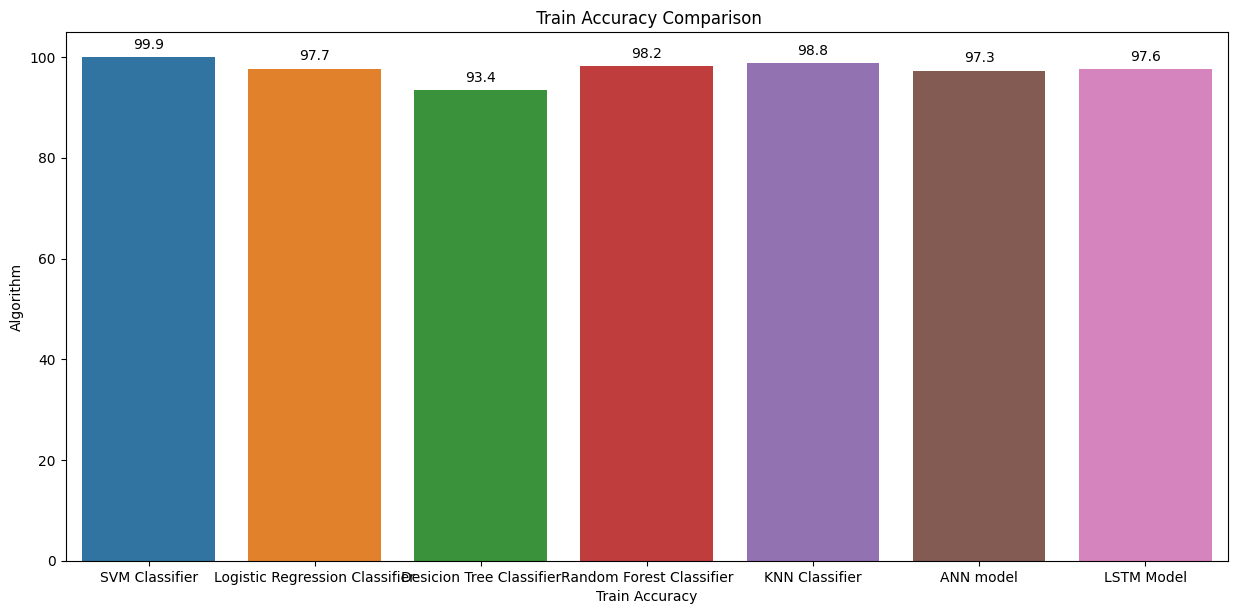

In [215]:
plt.figure(figsize=[15,7],dpi = 100)
plt.title(' Train Accuracy Comparison')
plt.xlabel('Train Accuracy')
plt.ylabel('Algorithm')
splot=sns.barplot(x=model_train,y=accuracy_train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()


<h4>Testing Accuracy Comparision</h4>

In [216]:
accuracy_test = list(test_accuracy.values())
model_test= list(test_accuracy.keys())

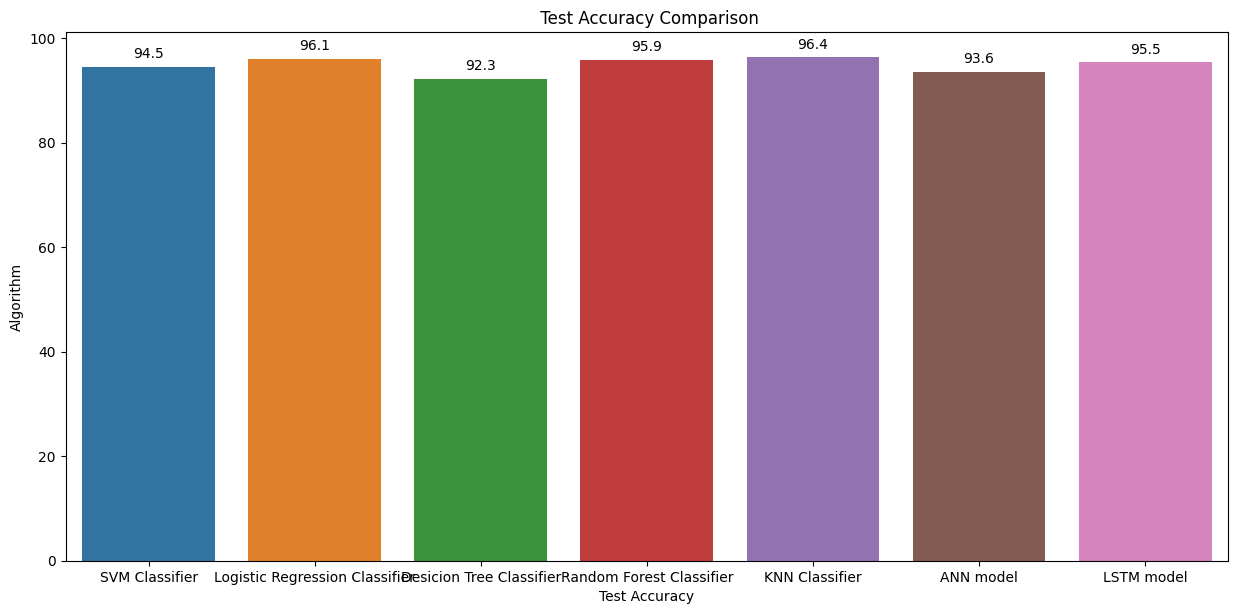

In [217]:
plt.figure(figsize=[15,7],dpi = 100)
plt.title(' Test Accuracy Comparison')
plt.xlabel('Test Accuracy')
plt.ylabel('Algorithm')
splot=sns.barplot(x=model_test,y=accuracy_test)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

#Conclusion


ANN model works better than all the Machine Learning classification Algorithms. Hence using ANN instead of ML algorithms will give better accuracy and model will be trained accurately.<br>
The trained model can be integrated with IOT devices and it can be used in fields to recommend farmers the best crop for their field.

<br>

Github Link: https://github.com/Sairam-04/Crop-Recommendation-System-Using-Deep-Learning

Demo of Flask Application<br><br>

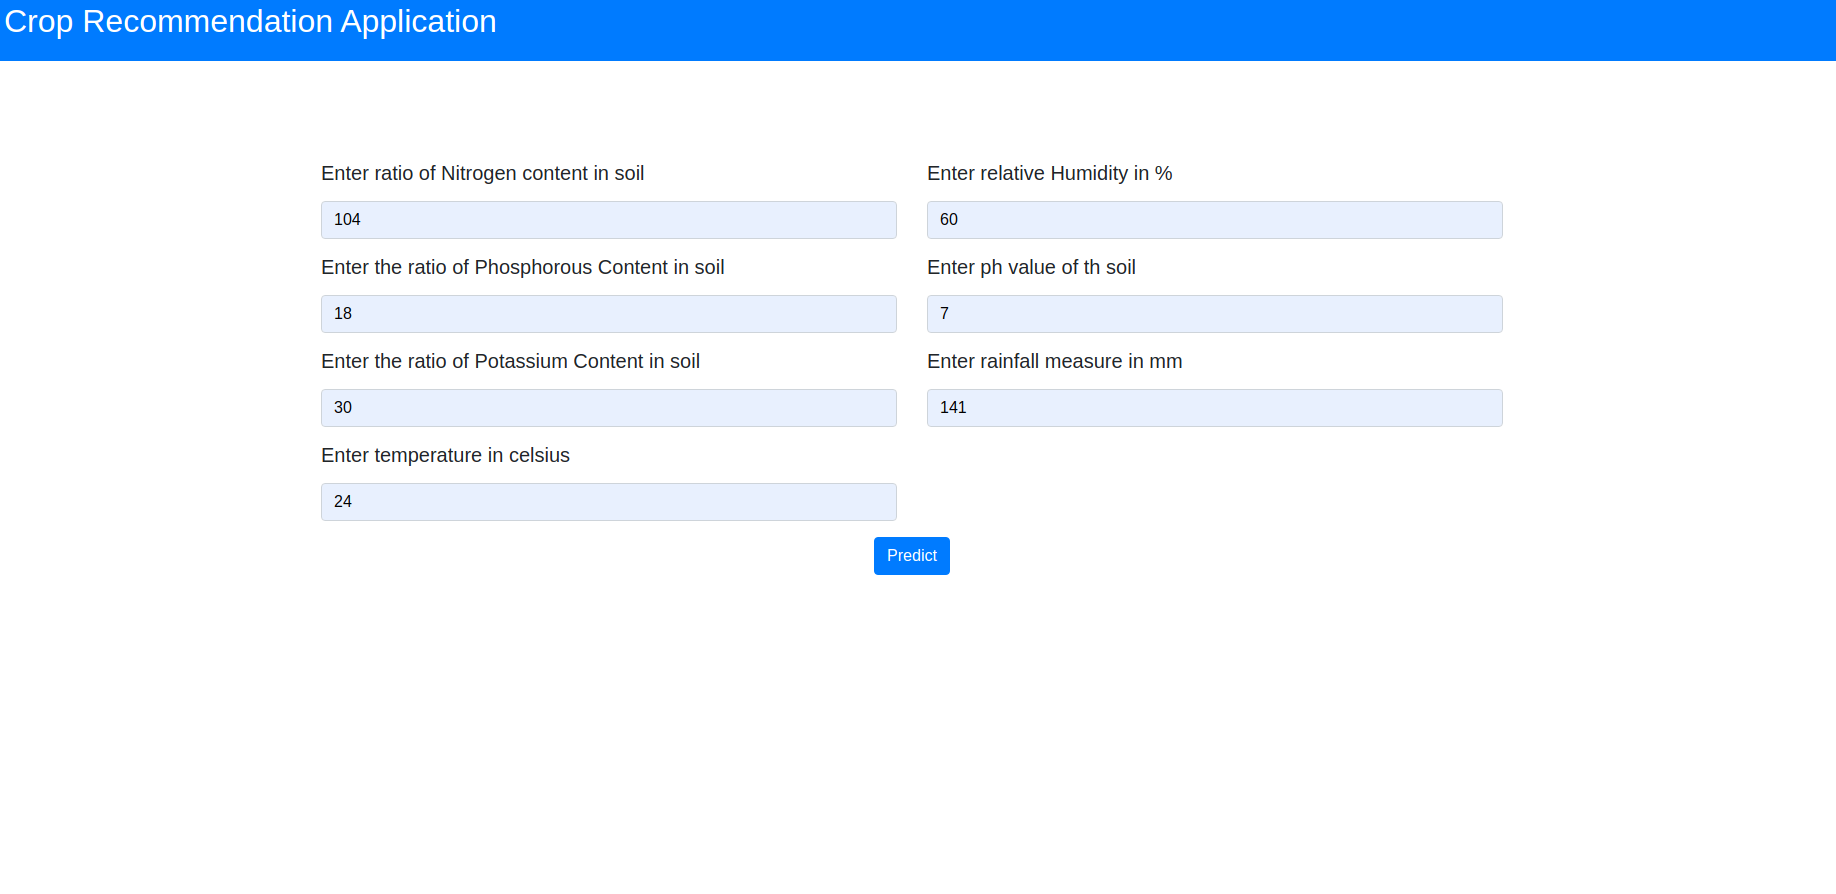
<br><br><br>
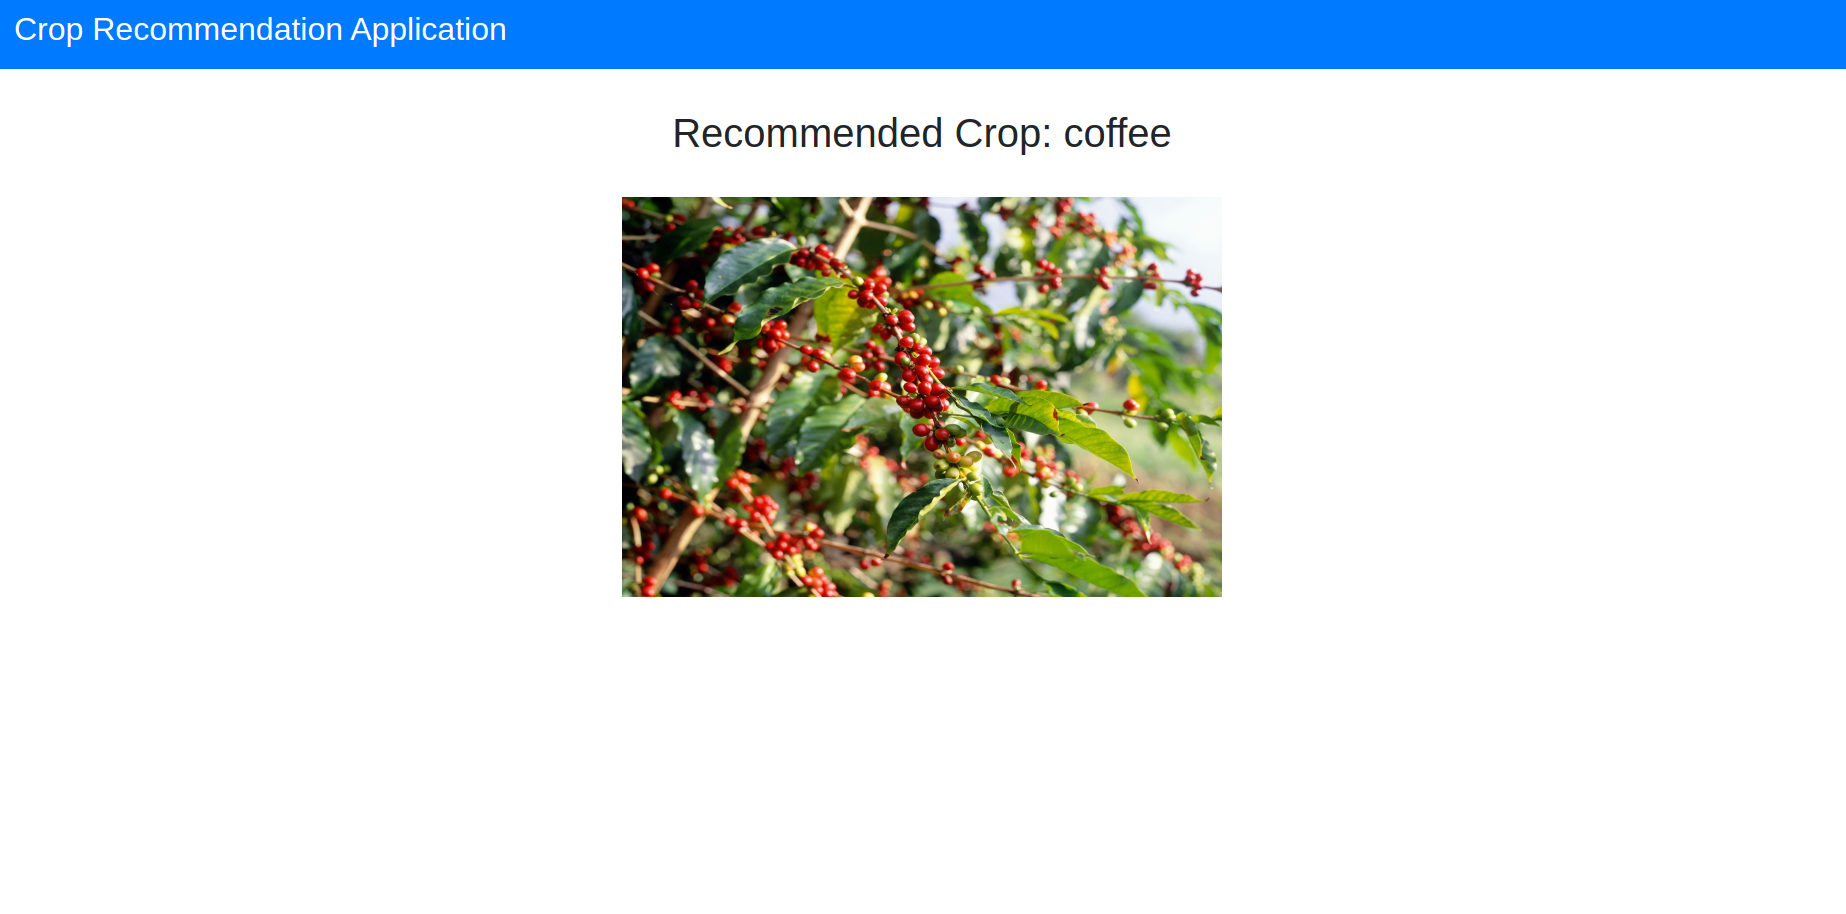